## Import Libraries

In [1]:
import yfinance as yf
import pandas as pd
import json
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Extract Data

### Extracting Data using API

##### yfinance
The **yfinance** is a Python library with a user-friendly interface for downloading historical market data from Yahoo Finance. 
It lets us get historical stock prices, dividends, and other financial data for stocks, exchange-traded funds (ETFs), and other securities.

##### How to use the yfinance library ?

* First, import the `yfinance` library using the alias `yf`.
* Then, create a `Ticker` object for the Microsoft stock (“MSFT”).
* Use the `history` method of the Ticker object to download the historical data for the stock. 
* The `period` parameter of the `history` method specifies when you want to download the data. 
* Set the `period` to `max` to download the maximum available historical data.
* Print the downloaded data using the `head` function

### _APPLE_

#### Extract Stock Data

Use the `Ticker` module to create an object that allows to access functions to extract data.
To do this, provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.

In [2]:
apple = yf.Ticker("AAPL")
apple

yfinance.Ticker object <AAPL>

Copy and paste contents for "apple.json" file from [here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json)

##### Extract Stock Info

Use the attribute  <code>info</code> to extract information about the stock as a Python dictionary.

In [3]:
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
   
    # Print the type of data variable    
    #print("Type:", type(apple_info))

apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [4]:
apple_info['country']               

'United States'

#### Extract Share Price

A **share** is the single smallest part of a company's stock that one can buy, the prices of these shares fluctuate over time. 

Use the <code>history()</code> method to get the share price of the stock over a certain period of time. 

Use the `period` parameter to set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

In [5]:
apple_share_price_data = apple.history(period="max")
apple_share_price_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-24 00:00:00-05:00,224.779999,225.630005,221.410004,222.779999,54697900,0.0,0.0
2025-01-27 00:00:00-05:00,224.020004,232.149994,223.979996,229.860001,94863400,0.0,0.0
2025-01-28 00:00:00-05:00,230.850006,240.190002,230.809998,238.259995,75707600,0.0,0.0


The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


Reset the index of the DataFrame with the `reset_index` function. Also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.

In [6]:
apple_share_price_data.reset_index(inplace=True)                   # run it once else it will keep on adding index columns
apple_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0


##### Plot the `Open` price against the `Date`

<Axes: xlabel='Date'>

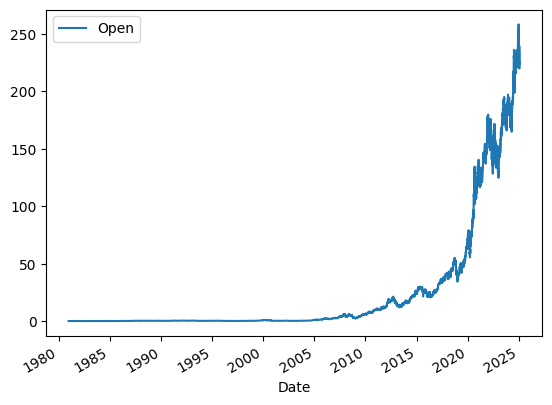

In [7]:
apple_share_price_data.plot(x="Date", y="Open")

#### Extract Dividends

**Dividends** are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. 

Use the variable `dividends` to get a dataframe of the data. The period of the data is given by the period defined in the `history` function.

In [8]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2023-11-10 00:00:00-05:00    0.240000
2024-02-09 00:00:00-05:00    0.240000
2024-05-10 00:00:00-04:00    0.250000
2024-08-12 00:00:00-04:00    0.250000
2024-11-08 00:00:00-05:00    0.250000
Name: Dividends, Length: 85, dtype: float64

##### Plot the dividends overtime

<Axes: xlabel='Date'>

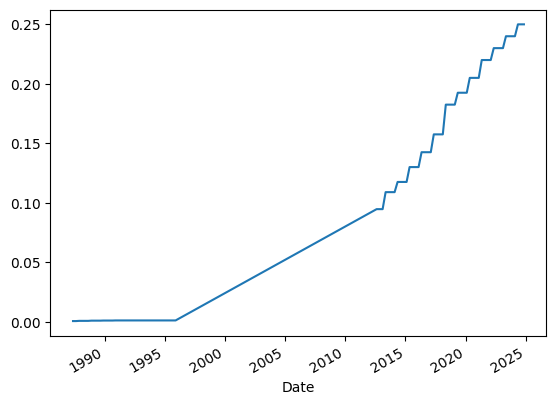

In [9]:
apple.dividends.plot()

### _AMD_

Use the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object <code>amd</code>.

In [10]:
amd = yf.Ticker("AMD")

Copy and paste contents for "amd.json" file from [here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json)

In [11]:
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))

amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

In [12]:
amd_info['country']

'United States'

In [13]:
amd_info['sector']

'Technology'

In [14]:
amd_share_price_data = amd.history(period="max")
amd_share_price_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.000000,3.302083,3.125000,3.145833,219600,0.0,0.0
1980-03-18 00:00:00-05:00,0.000000,3.125000,2.937500,3.031250,727200,0.0,0.0
1980-03-19 00:00:00-05:00,0.000000,3.083333,3.020833,3.041667,295200,0.0,0.0
1980-03-20 00:00:00-05:00,0.000000,3.062500,3.010417,3.010417,159600,0.0,0.0
1980-03-21 00:00:00-05:00,0.000000,3.020833,2.906250,2.916667,130800,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-24 00:00:00-05:00,124.550003,125.250000,122.230003,122.839996,31570300,0.0,0.0
2025-01-27 00:00:00-05:00,117.800003,118.080002,112.800003,115.010002,61067900,0.0,0.0
2025-01-28 00:00:00-05:00,115.180000,116.150002,112.949997,114.169998,40554800,0.0,0.0


In [15]:
amd_share_price_data.iloc[0][4]

C:\Users\shubh\AppData\Local\Temp\ipykernel_14540\802898173.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  amd_share_price_data.iloc[0][4]


219600.0

### Extract Data Using a Web Scraping

Not all stock data is available via the API; use web-scraping to obtain financial data.

Extract and share historical data from a web page using the BeautifulSoup library.

### _AMAZON_

#### Extract Stock Data


In [16]:
amazon_data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"

html_data = requests.get(amazon_data_url).text

soup = BeautifulSoup(html_data, 'html.parser')

In [17]:
soup.find('title')

<title>Amazon.com, Inc. (AMZN) Stock Historical Prices &amp; Data - Yahoo Finance</title>

Extract the table with historical share prices and store it into a data frame named `amazon_data`. 

The data frame should have columns Date, Open, High, Low, Close, Adj Close, and Volume. Fill in each variable with the correct data from the list `col`. 

In [18]:
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    amazon_data = pd.concat([amazon_data, pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)

amazon_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jan 01, 2021","3,270.00","3,363.89","3,086.00","3,206.20","71,528,900","3,206.20"
1,"Dec 01, 2020","3,188.50","3,350.65","3,072.82","3,256.93","77,556,200","3,256.93"
2,"Nov 01, 2020","3,061.74","3,366.80","2,950.12","3,168.04","90,810,500","3,168.04"
3,"Oct 01, 2020","3,208.00","3,496.24","3,019.00","3,036.15","116,226,100","3,036.15"
4,"Sep 01, 2020","3,489.58","3,552.25","2,871.00","3,148.73","115,899,300","3,148.73"


In [19]:
amazon_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [20]:
amazon_data.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
56,"May 01, 2016",663.92,724.23,656.00,722.79,"90,614,500",722.79
57,"Apr 01, 2016",590.49,669.98,585.25,659.59,"78,464,200",659.59
58,"Mar 01, 2016",556.29,603.24,538.58,593.64,"94,009,500",593.64
59,"Feb 01, 2016",578.15,581.80,474.00,552.52,"124,144,800",552.52
60,"Jan 01, 2016",656.29,657.72,547.18,587.00,"130,200,900",587.00


In [21]:
amazon_data.iloc[-1][1]

C:\Users\shubh\AppData\Local\Temp\ipykernel_14540\1394812219.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  amazon_data.iloc[-1][1]


'656.29'

### _TESLA_

#### Extract Stock Data

The the ticker symbol is `TSLA`.

In [22]:
tesla_data = yf.Ticker('TSLA')
tesla_data

yfinance.Ticker object <TSLA>

In [23]:
tesla_data = tesla_data.history(period="max")

tesla_data.reset_index(inplace=True)

tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


#### Extract Revenue Data

In [24]:
tesla_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

html_data = requests.get(tesla_url).text

soup = BeautifulSoup(html_data, 'html.parser')

In [25]:
tables = soup.find_all("table")

for i, table in enumerate(tables):
    print(f"Table {i}:")
    print(table.text[:200]) 

Table 0:



Tesla Annual Revenue(Millions of US $)




2021
$53,823


2020
$31,536


2019
$24,578


2018
$21,461


2017
$11,759


2016
$7,000


2015
$4,046


2014
$3,198


2013
$2,013


2012
$413


2011
$204


Table 1:



Tesla Quarterly Revenue(Millions of US $)




2022-09-30
$21,454


2022-06-30
$16,934


2022-03-31
$18,756


2021-12-31
$17,719


2021-09-30
$13,757


2021-06-30
$11,958


2021-03-31
$10,389


2020
Table 2:



Sector
Industry
Market Cap
Revenue




Auto/Tires/Trucks
Auto Manufacturers - Domestic
$549.575B
$53.823B



Tesla is the market leader in battery-powered electric car sales in the United States, w
Table 3:



Stock Name
Country
Market Cap
PE Ratio




General Motors (GM)
United States
$53.930B
5.56


Ford Motor (F)
United States
$52.668B
8.09


Harley-Davidson (HOG)
United States
$6.762B
9.56


Polaris 
Table 4:



Link Preview
HTML Code (Click to Copy)




Tesla Revenue 2010-2022 | TSLA



Macrotrends



Source




Table 5:



Link Preview
HTML Code (Click to 

In [26]:
table = tables[1]

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [27]:
for row in table.find_all("tr")[1:]:  # Skip header row
    cols = row.find_all("td")
    if len(cols) == 2:  # Ensure row has exactly 2 columns (Date & Revenue)
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

tesla_revenue.head()

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


In [28]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,$31
49,2010-06-30,$28
50,2010-03-31,$21
52,2009-09-30,$46
53,2009-06-30,$27


### _GAMESTOP_

#### Extract Stock Data

The ticker symbol is `GME`.

In [29]:
gme_data = yf.Ticker('GME')

gme_data

yfinance.Ticker object <GME>

In [30]:
gme_data = gme_data.history(period='max')

gme_data.reset_index(inplace=True)

gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [31]:
gme_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data2 = requests.get(gme_url).text

bsoup = BeautifulSoup(html_data2, 'html.parser')

In [32]:
gme_tables = bsoup.find_all("table")

for i, table in enumerate(tables):
    print(f"Table {i}:")
    print(table.text[:200]) 

Table 0:



Tesla Annual Revenue(Millions of US $)




2021
$53,823


2020
$31,536


2019
$24,578


2018
$21,461


2017
$11,759


2016
$7,000


2015
$4,046


2014
$3,198


2013
$2,013


2012
$413


2011
$204


Table 1:



Tesla Quarterly Revenue(Millions of US $)




2022-09-30
$21,454


2022-06-30
$16,934


2022-03-31
$18,756


2021-12-31
$17,719


2021-09-30
$13,757


2021-06-30
$11,958


2021-03-31
$10,389


2020
Table 2:



Sector
Industry
Market Cap
Revenue




Auto/Tires/Trucks
Auto Manufacturers - Domestic
$549.575B
$53.823B



Tesla is the market leader in battery-powered electric car sales in the United States, w
Table 3:



Stock Name
Country
Market Cap
PE Ratio




General Motors (GM)
United States
$53.930B
5.56


Ford Motor (F)
United States
$52.668B
8.09


Harley-Davidson (HOG)
United States
$6.762B
9.56


Polaris 
Table 4:



Link Preview
HTML Code (Click to Copy)




Tesla Revenue 2010-2022 | TSLA



Macrotrends



Source




Table 5:



Link Preview
HTML Code (Click to 

In [33]:
gme_table = gme_tables[1]

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [34]:
for row in gme_table.find_all("tr")[1:]:  # Skip header row
    cols = row.find_all("td")
    if len(cols) == 2:  # Ensure row has exactly 2 columns (Date & Revenue)
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

gme_revenue.head()

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


In [35]:
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

gme_revenue.tail()

,Date,Revenue
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


## Define Graphing Function

In [36]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    revenue_data_specific["Revenue"] = revenue_data_specific["Revenue"].replace('[\$,]', '', regex=True).astype(float)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

### Plot Tesla Stock Graph

In [37]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

C:\Users\shubh\AppData\Local\Temp\ipykernel_14540\1200444980.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shubh\AppData\Local\Temp\ipykernel_14540\1200444980.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\shubh\AppData\Local\Temp\ipykernel_14540\1200444980.py:7: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely re

### Plot GameStop Stock Graph

In [38]:
make_graph(gme_data, gme_revenue, 'GameStop')

C:\Users\shubh\AppData\Local\Temp\ipykernel_14540\1200444980.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\shubh\AppData\Local\Temp\ipykernel_14540\1200444980.py:7: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

